In [ ]:
pieces = [[[1,0,0],
           [1,0,0],
           [1,1,1]],

          [[0,2,0],
           [0,2,0],
           [2,2,2]],

          [[3,3,0],
           [0,3,0],
           [0,3,3]],

          [[4,0],
           [4,0],
           [4,4],
           [0,4]],

          [[5,0,5],
           [5,5,5]],

          [[6,6],
           [6,6],
           [6,0]],

          [[7,0],
           [7,0],
           [7,0],
           [7,7]],


          [[8,0],
           [8,8],
           [0,8]],

          [[9,0],
           [9,0],
           [9,9]],

          [[10],
           [10],
           [10],
           [10]]]

In [ ]:
base_board = [[0,0,0,0,0,0,99],
         [0,0,0,0,0,0,99],
         [0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0],
         [99,99,99,99,0,0,0]]

my_dict = {"Jan": (0,0),
           "Feb": (0,1),
           "Mar": (0,2),
           "Apr": (0,3),
           "May": (0,4),
           "Jun": (0,5),
           "Jul": (1,0),
           "Aug": (1,1),
           "Sep": (1,2),
           "Oct": (1,3),
           "Nov": (1,4),
           "Dec": (1,5),
           1: (2,0),
           2: (2,1),
           3: (2,2),
           4: (2,3),
           5: (2,4),
           6: (2,5),
           7: (2,6),
           8: (3,0),
           9: (3,1),
           10: (3,2),
           11: (3,3),
           12: (3,4),
           13: (3,5),
           14: (3,6),
           15: (4,0),
           16: (4,1),
           17: (4,2),
           18: (4,3),
           19: (4,4),
           20: (4,5),
           21: (4,6),
           22: (5,0),
           23: (5,1),
           24: (5,2),
           25: (5,3),
           26: (5,4),
           27: (5,5),
           28: (5,6),
           29: (6,0),
           30: (6,1),
           31: (6,2),
           "Sun": (6,3),
           "Mon": (6,4),
           "Tue": (6,5),
           "Wed": (6,6),
           "Thu": (7,4),
           "Fri": (7,5),
           "Sat": (7,6)}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def visualize_board(board, title="Puzzle Board"):
    # Create a list of custom colors: white for empty spaces, black for 99, gray for 89, and distinct colors for pieces
    custom_colors = [
        '#000000',  # Black for blocked cells (99)
        '#808080',  # Gray for additional blocked cells (89)
        '#e6194b',  # Bright Red
        '#3cb44b',  # Bright Green
        '#ffe119',  # Bright Yellow
        '#4363d8',  # Bright Blue
        '#f58231',  # Bright Orange
        '#911eb4',  # Dark Purple
        '#46f0f0',  # Cyan
        '#f032e6',  # Magenta
        '#bcf60c',  # Lime Green
        '#fabebe',  # Light Pink
        '#008080',  # Teal
        '#e6beff',  # Lavender
        '#9a6324'   # Brown
    ]

    # Create a colormap object using the custom colors
    num_pieces = len(set([cell for row in board for cell in row if cell not in (0, 99, 89)]))
    cmap = ListedColormap(custom_colors[:num_pieces + 3])  # +3 for empty spaces, 99 (black), and 89 (gray)

    # Convert board into a matrix for visualization
    display_board = np.zeros_like(board, dtype=int)

    # Map board values to the appropriate indices in the color palette
    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] == 0:
                display_board[i][j] = 0  # Unoccupied space (white)
            elif board[i][j] == 99:
                display_board[i][j] = 1  # Blocked cells (black)
            elif board[i][j] == 89:
                display_board[i][j] = 2  # Additional blocked cells (gray)
            else:
                display_board[i][j] = board[i][j] + 2  # Adjust piece numbers to colormap index

    # Plot the board with the corresponding colors
    plt.figure(figsize=(10, 8))
    plt.imshow(display_board, cmap=cmap, interpolation='nearest')

    # Add labels, title, and color bar for context
    plt.colorbar(ticks=np.arange(0, num_pieces + 3), label='Piece Number')
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.xticks(np.arange(-0.5, len(board[0]), 1), labels=np.arange(len(board[0]) + 1))
    plt.yticks(np.arange(-0.5, len(board), 1), labels=np.arange(len(board) + 1))
    plt.grid(True, which='both', color='black', linestyle='-', linewidth=0.5)

    # Highlight grid lines to separate cells
    plt.gca().set_xticks(np.arange(-0.5, len(board[0]), 1), minor=True)
    plt.gca().set_yticks(np.arange(-0.5, len(board), 1), minor=True)
    plt.gca().grid(which='minor', color='black', linestyle='-', linewidth=1.5)
    plt.show()

def create_board(base_board, month, number, weekday):
  board = [row[:] for row in base_board]
  values = [month, number, weekday]
  x = 0
  y = 0
  for value in values:
    x = my_dict[value][0]
    y = my_dict[value][1]
    board[x][y] = 89
  return board


def print_board(board):
  for row in board:
    print(row)

def can_place_piece(board, piece, x, y):
  for i in range(len(piece)):
    for j in range(len(piece[i])):
      if piece[i][j] > 0:
        if (i + x >= len(board) or
        j + y >= len(board[0]) or
        board[i + x][j + y] != 0):
          return False
  return True

def place_piece(board, piece, x, y, index):
  for i in range(len(piece)):
    for j in range(len(piece[i])):
      if piece[i][j] !=0:
        board[i+x][j+y] = index + 1

def remove_piece(board, piece, x, y):
    for i in range(len(piece)):
        for j in range(len(piece[i])):
            if piece[i][j] != 0:
                board[i + x][j + y] = 0

def rotate_piece(piece):
    return [list(row) for row in zip(*piece[::-1])]

def flip_piece(piece):
    return [row[::-1] for row in piece]

def solve_puzzle(board, pieces, index = 0):
  if index == len(pieces):
    return True

  piece = pieces[index]
  for _ in range(4):  # Rotate 0, 90, 180, 270 degrees
        if can_place_piece(board, piece, 0, 0):
            for x in range(len(board)):
                for y in range(len(board[0])):
                    if can_place_piece(board, piece, x, y):  # Check if the piece can be placed
                        place_piece(board, piece, x, y, index)  # Place the piece
                        if solve_puzzle(board, pieces, index + 1):  # Recur for next piece
                            return True
                        remove_piece(board, piece, x, y)  # Backtrack by removing the piece
        piece = rotate_piece(piece)  # Rotate the piece for the next iteration

  flipped_piece = flip_piece(pieces[index])
  for _ in range(4):  # Rotate flipped version as well
      for x in range(len(board)):
          for y in range(len(board[0])):
              if can_place_piece(board, flipped_piece, x, y):  # Check if the flipped piece can be placed
                  place_piece(board, flipped_piece, x, y, index)  # Place the piece
                  if solve_puzzle(board, pieces, index + 1):  # Recur for next piece
                      return True
                  remove_piece(board, flipped_piece, x, y)  # Backtrack by removing the piece
      flipped_piece = rotate_piece(flipped_piece)  # Rotate the flipped piece for the next iteration

  return False


Solution Found:


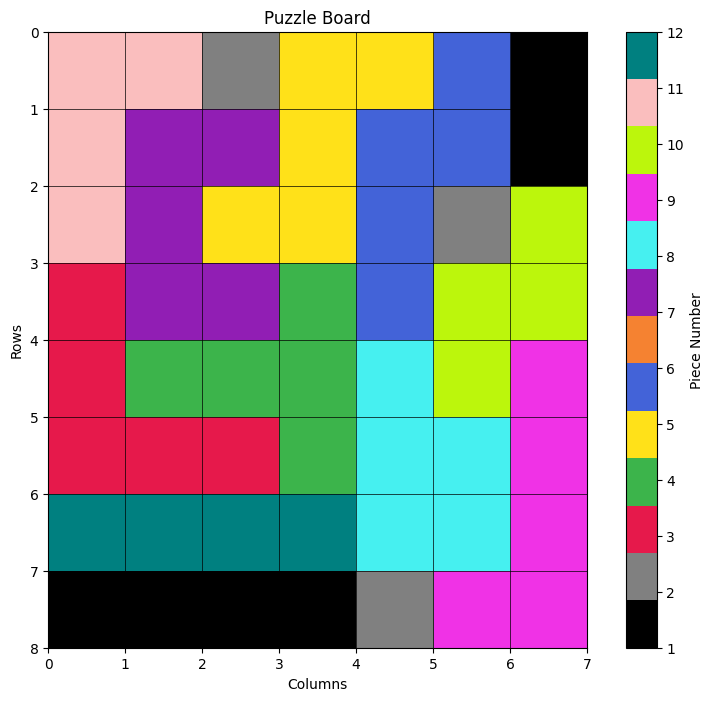

In [ ]:
board = create_board(base_board, "Mar", 6, "Thu")

if solve_puzzle(board, pieces):
    print("Solution Found:")
    visualize_board(board)
else:
    print("No solution exists")
    print_board(board)